In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler

In [3]:
xl_file = pd.ExcelFile(r'C:\Users\john.osorio\Desktop\BLACK CAT\Qantas Tech Test\International_airline_activity_CityPairs_2009toCurrent_1811.xls')

In [4]:
df = pd.read_excel(xl_file, 'Data')

In [5]:
df.head()

,Month,AustralianPort,ForeignPort,Country,PaxIn,FreightIn,MailIn,PaxOut,FreightOut,MailOut,TotalPax,TotalFreight,TotalMail,Year,"<< This year is based on the month selected in cell E2 in sheet ""Totals"" - it is only a calendar year if the month in sheet ""Totals"" is set to December"
0,2009-01-01,Adelaide,Auckland,New Zealand,3325,15.65,0,2704,29.396,0,6029,45.046,0.000,2009,NaN
1,2009-01-01,Adelaide,Denpasar,Indonesia,1124,0,0,1111,0,0,2235,0.000,0.000,2009,NaN
2,2009-01-01,Adelaide,Hong Kong,Hong Kong (SAR),3939,75.769,0,2678,181.026,0,6617,256.795,0.000,2009,NaN
3,2009-01-01,Adelaide,Kuala Lumpur,Malaysia,4079,68.746,0,3074,100.792,0,7153,169.538,0.000,2009,NaN
4,2009-01-01,Adelaide,Singapore,Singapore,12678,260.074,0.002,10401,285.891,5.913,23079,545.965,5.915,2009,NaN


In [6]:
df.drop('<< This year is based on the month selected in cell E2 in sheet "Totals" - it is only a calendar year if the month in sheet "Totals" is set to December',
       axis='columns', inplace=True)

In [7]:
df.head()

,Month,AustralianPort,ForeignPort,Country,PaxIn,FreightIn,MailIn,PaxOut,FreightOut,MailOut,TotalPax,TotalFreight,TotalMail,Year
0,2009-01-01,Adelaide,Auckland,New Zealand,3325,15.65,0,2704,29.396,0,6029,45.046,0.000,2009
1,2009-01-01,Adelaide,Denpasar,Indonesia,1124,0,0,1111,0,0,2235,0.000,0.000,2009
2,2009-01-01,Adelaide,Hong Kong,Hong Kong (SAR),3939,75.769,0,2678,181.026,0,6617,256.795,0.000,2009
3,2009-01-01,Adelaide,Kuala Lumpur,Malaysia,4079,68.746,0,3074,100.792,0,7153,169.538,0.000,2009
4,2009-01-01,Adelaide,Singapore,Singapore,12678,260.074,0.002,10401,285.891,5.913,23079,545.965,5.915,2009


We are only concerned with passenger traffic going from Sydney to LA

For now create a new df containing only the relevant features

In [8]:
df.drop(['PaxIn','FreightIn', 'MailIn', 'FreightOut', 'MailOut', 'TotalPax', 'TotalFreight', 'TotalMail'], axis = 'columns', inplace=True)

Then get only the ones that are from Sydney to LA

In [9]:
new_df = df[(df.AustralianPort == 'Sydney') & (df.ForeignPort == 'Los Angeles')]

In [10]:
new_df.shape

(119, 6)

In [19]:
new_df.dtypes

Month             datetime64[ns]
AustralianPort            object
ForeignPort               object
Country                   object
PaxOut                    object
Year                       int64
dtype: object

In [11]:
new_df.head()

,Month,AustralianPort,ForeignPort,Country,PaxOut,Year
121,2009-01-01,Sydney,Los Angeles,USA,22603,2009
267,2009-02-01,Sydney,Los Angeles,USA,17870,2009
410,2009-03-01,Sydney,Los Angeles,USA,25717,2009
550,2009-04-01,Sydney,Los Angeles,USA,28520,2009
685,2009-05-01,Sydney,Los Angeles,USA,27490,2009


Let's normalize the PaxOut and plot the values and see if there is a pattern of some sort

In [34]:
# new_df['pax_out_norm'] = StandardScaler().fit_transform(new_df['PaxOut'].values.reshape(-1, 1))
# new_df.drop('PaxOut', axis='columns', inplace=True)

C:\Users\john.osorio\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\john.osorio\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\john.osorio\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [21]:
new_df['Month_f'] = pd.factorize(new_df['Month'])[0] + 1
mapping = dict(zip(new_df['Month_f'], new_df['Month'].dt.date))

C:\Users\john.osorio\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [32]:
new_df

,Month,AustralianPort,ForeignPort,Country,PaxOut,Year,Month_f
121,2009-01-01,Sydney,Los Angeles,USA,22603,2009,1
267,2009-02-01,Sydney,Los Angeles,USA,17870,2009,2
410,2009-03-01,Sydney,Los Angeles,USA,25717,2009,3
550,2009-04-01,Sydney,Los Angeles,USA,28520,2009,4
685,2009-05-01,Sydney,Los Angeles,USA,27490,2009,5
834,2009-06-01,Sydney,Los Angeles,USA,29600,2009,6
977,2009-07-01,Sydney,Los Angeles,USA,37280,2009,7
1123,2009-08-01,Sydney,Los Angeles,USA,34509,2009,8
1270,2009-09-01,Sydney,Los Angeles,USA,35531,2009,9
1414,2009-10-01,Sydney,Los Angeles,USA,35064,2009,10


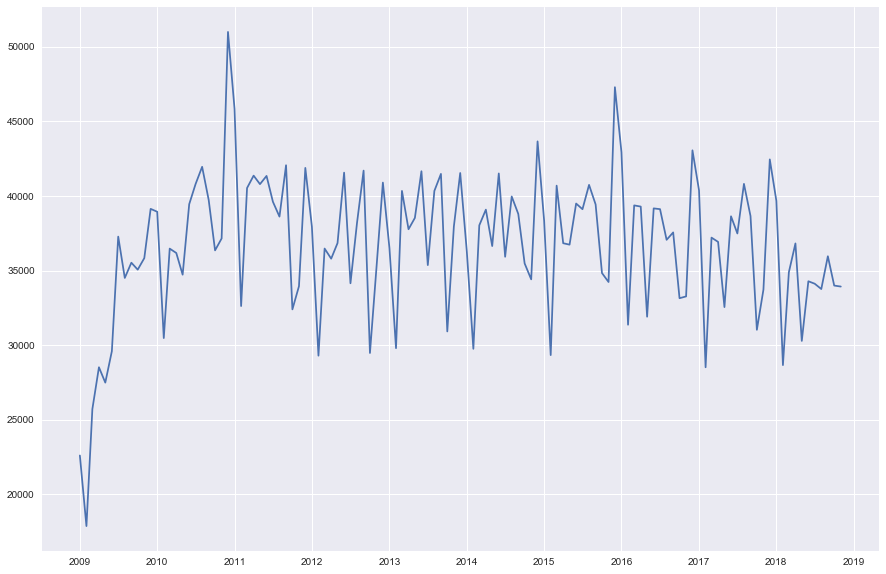

In [29]:
plt.plot(new_df.Month, new_df.PaxOut)
plt.show()

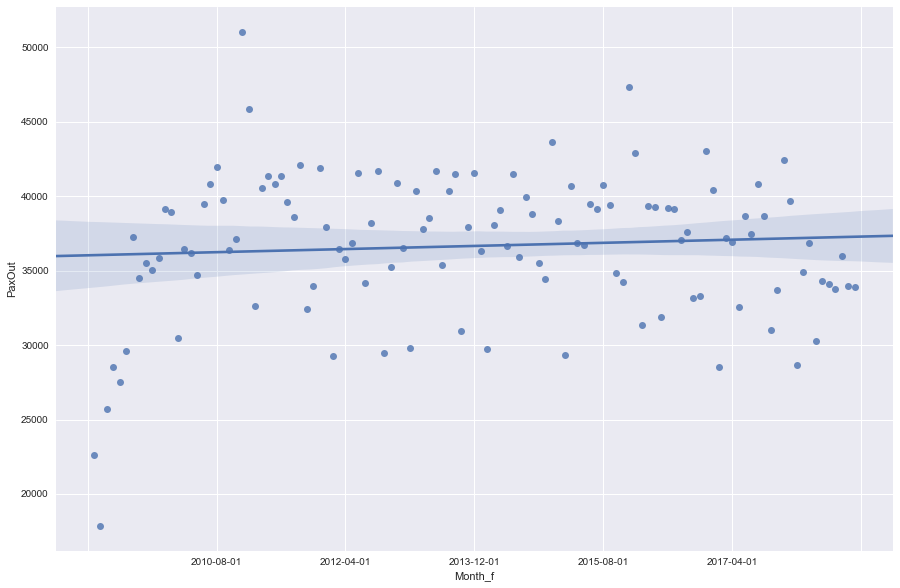

In [31]:
ax = sns.regplot(new_df.Month_f, new_df.PaxOut)
labels = pd.Series(ax.get_xticks()).map(mapping).fillna('')
ax.set_xticklabels(labels)
sns.set(rc={'figure.figsize':(15,10)})